In [7]:
# Upload THE DATASET zip file
from google.colab import files
rc = list(files.upload().values())[0]

Saving SKIP_CONNECTION.png to SKIP_CONNECTION (1).png


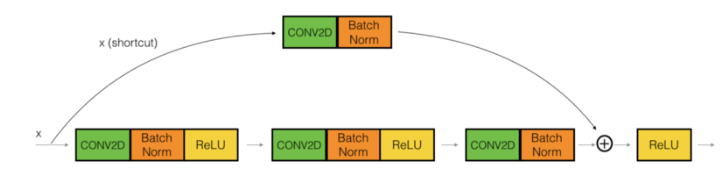

In [8]:
from IPython.display import Image
Image('SKIP_CONNECTION.png')

In [0]:
import keras
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [0]:
img_shape = (41, 41, 1)
input_img = Input(shape=(img_shape),name = 'X')

#SKIP LAYER LAYER CONNECTION
#01 LAYER
C1 = Conv2D(64, (3, 3), padding='same', name='CONV2D1')(input_img)
BN1 = BatchNormalization(axis = 3, name = 'BatchNorm1')(C1)

#STRAIGHT PATH CONNECTION
#02 LAYER
C2 = Conv2D(64, (3, 3), padding='same', name='CONV2D2')(input_img)
BN2 = BatchNormalization(axis = 3, name = 'BatchNorm2')(C2)
A2 = Activation('relu', name='ReLU1')(BN2)

#03 LAYER
C3 = Conv2D(64, (3, 3), padding='same', name='CONV2D3')(A2)
BN3 = BatchNormalization(axis = 3, name = 'BatchNorm3')(C3)
A3 = Activation('relu', name='ReLU2')(BN3)

#04 LAYER
C4 = Conv2D(1, (3, 3), padding='same', name='CONV2D4')(A3)
BN4 = BatchNormalization(axis = 3, name = 'BatchNorm4')(C4)

#05 SUM LAYER
output_img = keras.layers.add([BN4, BN1])
A4 = Activation('relu', name='ReLU4')(output_img)
model = Model(input_img, A4)

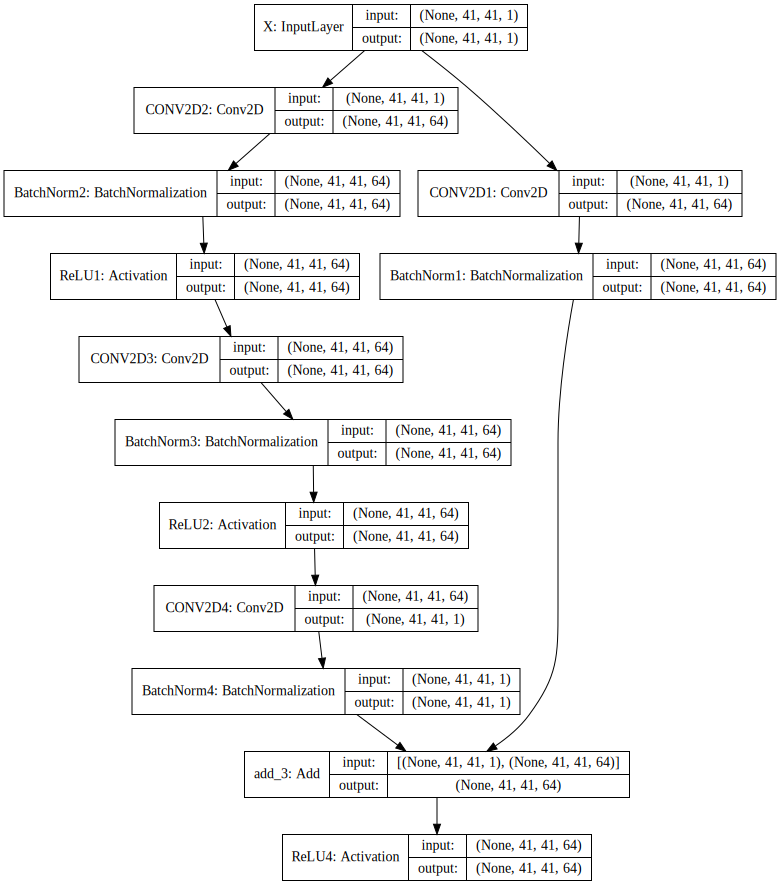

In [11]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))